In [1]:
import random
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF , WhiteKernel


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,111)

In [5]:
virtual_samples

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. ])

## define a callable Kriging model and sampling function

In [6]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_obs = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_obs.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_obs))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std), np.array(Y_obs)


# fixed noise level


In [7]:
# instantiate Bgolearn
Bgolearn = BGOS.Bgolearn()
method_name = 'EI'

obs = 5
tolerance = 0.05

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Expected Improvement : 
 x =  [8.5]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.4097438854274142
2 -th sampling, result =  4.144097313982986
3 -th sampling, result =  4.422388620914105
4 -th sampling, result =  3.8126021401100587
5 -th sampling, result =  3.62474869394422
evaluated mean of added datum: [3.88271613]
evaluated std of added datum: 0.36186528835169907
---------------------------------------

1-th iteration 
 new added datum: (8.5, array([3.88271613]))


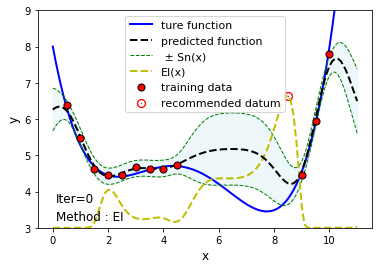

current optimal is : 3.8827161308757567
The next datum recomended by Expected Improvement : 
 x =  [8.2]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.802999105682629
2 -th sampling, result =  3.1122357527606552
3 -th sampling, result =  3.6379066469669157
4 -th sampling, result =  4.000265228929993
5 -th sampling, result =  3.5629592245427517
evaluated mean of added datum: [3.62327319]
evaluated std of added datum: 0.2964576114511789
---------------------------------------

2-th iteration 
 new added datum: (8.200000000000001, array([3.62327319]))


<Figure size 432x288 with 0 Axes>

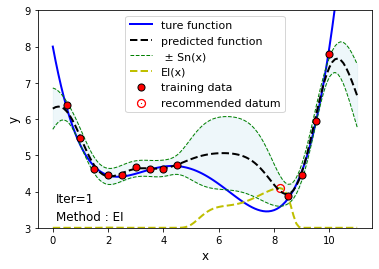

current optimal is : 3.623273191776589
The next datum recomended by Expected Improvement : 
 x =  [7.4]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.2260089057025634
2 -th sampling, result =  2.789983631040565
3 -th sampling, result =  3.204526803372199
4 -th sampling, result =  3.0799493384446195
5 -th sampling, result =  3.3771655051664022
evaluated mean of added datum: [3.13552684]
evaluated std of added datum: 0.19688890857521177
---------------------------------------

3-th iteration 
 new added datum: (7.4, array([3.13552684]))


<Figure size 432x288 with 0 Axes>

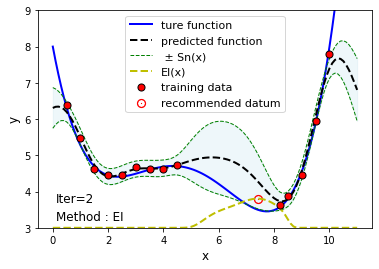

current optimal is : 3.13552683674527
The next datum recomended by Expected Improvement : 
 x =  [6.7]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.9959686698177395
2 -th sampling, result =  4.028798055599946
3 -th sampling, result =  4.303843314550044
4 -th sampling, result =  3.9121538438863337
5 -th sampling, result =  4.181428549801003
evaluated mean of added datum: [4.08443849]
evaluated std of added datum: 0.14010732675050033
---------------------------------------

4-th iteration 
 new added datum: (6.7, array([4.08443849]))


<Figure size 432x288 with 0 Axes>

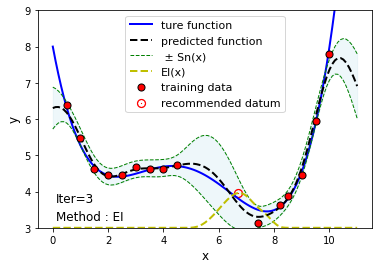

current optimal is : 3.13552683674527
The next datum recomended by Expected Improvement : 
 x =  [7.6]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.426204719902294
2 -th sampling, result =  3.0441651483314067
3 -th sampling, result =  3.7044763989936045
4 -th sampling, result =  3.2542688059148506
5 -th sampling, result =  3.5567103670412488
evaluated mean of added datum: [3.39716509]
evaluated std of added datum: 0.23055001322479582
---------------------------------------

5-th iteration 
 new added datum: (7.6000000000000005, array([3.39716509]))


<Figure size 432x288 with 0 Axes>

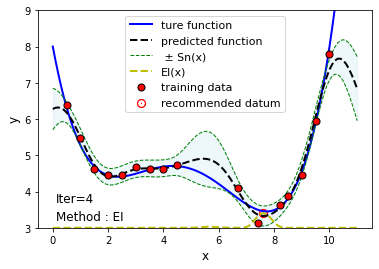

current optimal is : 3.13552683674527
The next datum recomended by Expected Improvement : 
 x =  [7.6]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.325168694483237
2 -th sampling, result =  3.478373070061322
3 -th sampling, result =  3.4846588067580044
4 -th sampling, result =  3.806410263184326
5 -th sampling, result =  3.657705799757356
evaluated mean of added datum: [3.55046333]
evaluated std of added datum: 0.16570738883699956
---------------------------------------

6-th iteration 
 new added datum: (7.6000000000000005, array([3.55046333]))


<Figure size 432x288 with 0 Axes>

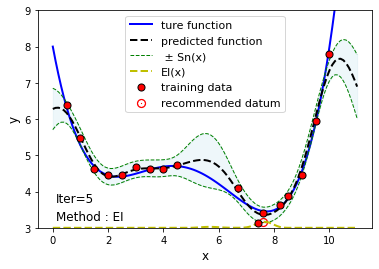

last response =  3.397165088036681
added datum y =  [3.55046333] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [8]:
guessed_noise_std = 0.3


data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Expected Improvement : 
 x =  [8.4]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  5.894155453668205
2 -th sampling, result =  3.6566005698602853
3 -th sampling, result =  3.8404400622757247
4 -th sampling, result =  3.43799163548288
5 -th sampling, result =  4.070397647203642
evaluated mean of added datum: [4.17991707]
evaluated std of added datum: 0.882061889947225
---------------------------------------

1-th iteration 
 new added datum: (8.4, array([4.17991707]))


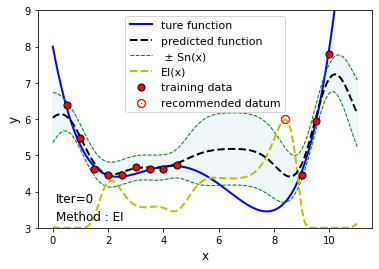

current optimal is : 4.179917073698148
The next datum recomended by Expected Improvement : 
 x =  [8.3]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.3802119606728827
2 -th sampling, result =  3.249972612309103
3 -th sampling, result =  3.845276818457443
4 -th sampling, result =  3.6229329814426303
5 -th sampling, result =  3.330000104023406
evaluated mean of added datum: [3.4856789]
evaluated std of added datum: 0.21866227964436918
---------------------------------------

2-th iteration 
 new added datum: (8.3, array([3.4856789]))


<Figure size 432x288 with 0 Axes>

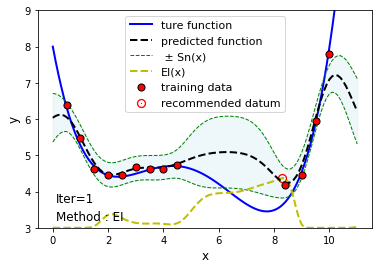

current optimal is : 3.485678895381093
The next datum recomended by Expected Improvement : 
 x =  [7.5]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  4.453442569306706
2 -th sampling, result =  3.4189395354948435
3 -th sampling, result =  2.847994697459929
4 -th sampling, result =  4.075200268005204
5 -th sampling, result =  3.8980462424546927
evaluated mean of added datum: [3.73872466]
evaluated std of added datum: 0.5558926664966003
---------------------------------------

3-th iteration 
 new added datum: (7.5, array([3.73872466]))


<Figure size 432x288 with 0 Axes>

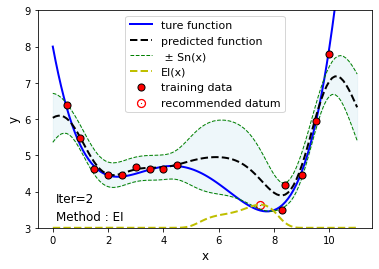

current optimal is : 3.485678895381093
The next datum recomended by Expected Improvement : 
 x =  [6.4]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  4.406341595947152
2 -th sampling, result =  4.167455599447684
3 -th sampling, result =  3.21613939386969
4 -th sampling, result =  4.411179868512119
5 -th sampling, result =  4.618703827251435
evaluated mean of added datum: [4.16396406]
evaluated std of added datum: 0.4949817310573698
---------------------------------------

4-th iteration 
 new added datum: (6.4, array([4.16396406]))


<Figure size 432x288 with 0 Axes>

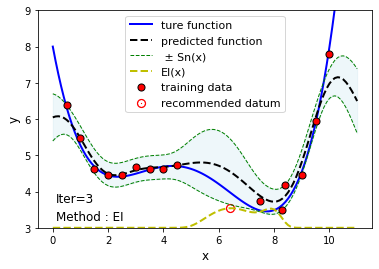

current optimal is : 3.485678895381093
The next datum recomended by Expected Improvement : 
 x =  [7.8]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.0592944600923646
2 -th sampling, result =  3.6537568839311505
3 -th sampling, result =  4.194329011601865
4 -th sampling, result =  3.360314474645368
5 -th sampling, result =  3.3961658810701953
evaluated mean of added datum: [3.53277214]
evaluated std of added datum: 0.38075683377106095
---------------------------------------

5-th iteration 
 new added datum: (7.800000000000001, array([3.53277214]))


<Figure size 432x288 with 0 Axes>

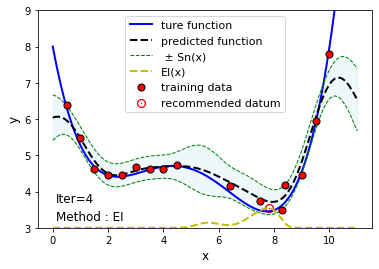

current optimal is : 3.485678895381093
The next datum recomended by Expected Improvement : 
 x =  [7.8]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  2.2130058731656472
2 -th sampling, result =  2.879709764804172
3 -th sampling, result =  3.6765333941784264
4 -th sampling, result =  3.39937241554102
5 -th sampling, result =  3.111012311410154
evaluated mean of added datum: [3.05592675]
evaluated std of added datum: 0.4995417863458261
---------------------------------------

6-th iteration 
 new added datum: (7.800000000000001, array([3.05592675]))


<Figure size 432x288 with 0 Axes>

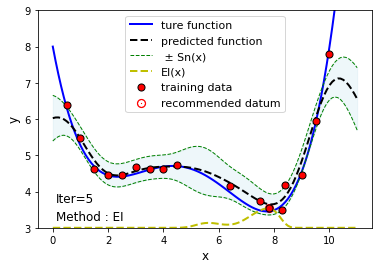

current optimal is : 3.0559267518198836
The next datum recomended by Expected Improvement : 
 x =  [7.5]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  2.5051300088387634
2 -th sampling, result =  3.8757097008649515
3 -th sampling, result =  3.275540508066896
4 -th sampling, result =  2.9037828387019817
5 -th sampling, result =  2.978736011047399
evaluated mean of added datum: [3.10777981]
evaluated std of added datum: 0.45591968992056275
---------------------------------------

7-th iteration 
 new added datum: (7.5, array([3.10777981]))


<Figure size 432x288 with 0 Axes>

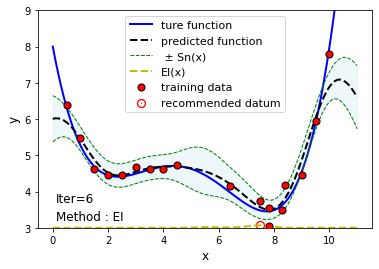

last response =  3.0559267518198836
added datum y =  [3.10777981] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [13]:
guessed_noise_std = 0.5


data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Expected Improvement : 
 x =  [8.3]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.9894103801778886
2 -th sampling, result =  4.332892441446063
3 -th sampling, result =  3.053882809583355
4 -th sampling, result =  4.578305026305161
5 -th sampling, result =  4.766298876755315
evaluated mean of added datum: [4.14415791]
evaluated std of added datum: 0.6039553654113955
---------------------------------------

1-th iteration 
 new added datum: (8.3, array([4.14415791]))


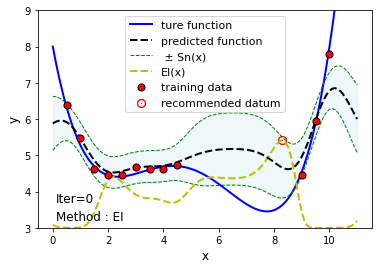

current optimal is : 4.144157906853557
The next datum recomended by Expected Improvement : 
 x =  [8.1]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.484061938989432
2 -th sampling, result =  4.52143557010234
3 -th sampling, result =  2.5222289493177827
4 -th sampling, result =  3.337830556858377
5 -th sampling, result =  4.24618065276486
evaluated mean of added datum: [3.62234753]
evaluated std of added datum: 0.7082175898920744
---------------------------------------

2-th iteration 
 new added datum: (8.1, array([3.62234753]))


<Figure size 432x288 with 0 Axes>

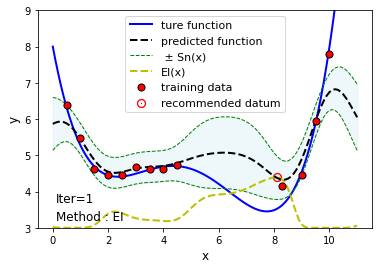

current optimal is : 3.6223475336065576
The next datum recomended by Expected Improvement : 
 x =  [7.4]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.673586064108869
2 -th sampling, result =  3.2395496321610215
3 -th sampling, result =  3.005904466568055
4 -th sampling, result =  3.8667265136754834
5 -th sampling, result =  3.648870217047193
evaluated mean of added datum: [3.48692738]
evaluated std of added datum: 0.31556080939725
---------------------------------------

3-th iteration 
 new added datum: (7.4, array([3.48692738]))


<Figure size 432x288 with 0 Axes>

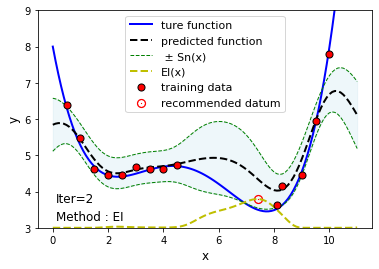

last response =  3.6223475336065576
added datum y =  [3.48692738] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [124]:
guessed_noise_std = 0.7


data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)
class Kriging_model(object):
    def fit_pre(self,xtrain,ytrain,xtest):
        # instantiated model
        kernel = RBF() 
        mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = guessed_noise_std**2).fit(xtrain,ytrain)
        # defined the attribute's outputs
        mean,std = mdoel.predict(xtest,return_std=True)
        return mean,std  

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,guessed_noise_std,obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('fixnoise_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('fixnoise{noise}_iter{time}data.csv'.format(noise=guessed_noise_std, time = i+1),float_format='%.4f') 

# optimal noise level of likelihood

In [9]:
def likelihood_opt_noise(xtrain,ytrain):
    noise_kernel = RBF() + WhiteKernel()
    noise_mdoel = GaussianProcessRegressor(kernel=noise_kernel,normalize_y=True).fit(xtrain,ytrain)
    optimal_noise = np.exp(noise_mdoel.kernel_.theta[1])
    return optimal_noise

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Expected Improvement : 
 x =  [8.6]
--------------Draw samples-------------
real std of added datum: 0.004506961367621219
1 -th sampling, result =  3.913492853744189
2 -th sampling, result =  3.9071533357881045
3 -th sampling, result =  3.9142449352849225
4 -th sampling, result =  3.9122004435665465
5 -th sampling, result =  3.9051344675934883
evaluated mean of added datum: [3.91044521]
evaluated std of added datum: 0.003628975344108289
---------------------------------------

1-th iteration 
 new added datum: (8.6, array([3.91044521]))


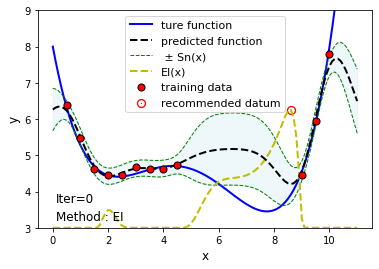

current optimal is : 3.9104452071954503
The next datum recomended by Expected Improvement : 
 x =  [7.3]
--------------Draw samples-------------
real std of added datum: 0.004153045940139708
1 -th sampling, result =  3.522699455310116
2 -th sampling, result =  3.5273594442090306
3 -th sampling, result =  3.534346327922923
4 -th sampling, result =  3.530805519634672
5 -th sampling, result =  3.530512694317493
evaluated mean of added datum: [3.52914469]
evaluated std of added datum: 0.003909347278283578
---------------------------------------

2-th iteration 
 new added datum: (7.300000000000001, array([3.52914469]))


<Figure size 432x288 with 0 Axes>

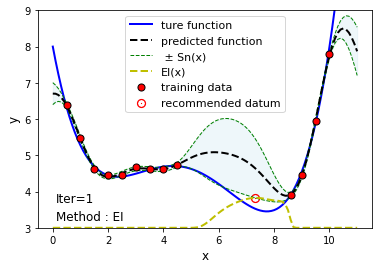

current optimal is : 3.529144688278847
The next datum recomended by Expected Improvement : 
 x =  [6.6]
--------------Draw samples-------------
real std of added datum: 0.00339591208632646
1 -th sampling, result =  3.865882461018736
2 -th sampling, result =  3.861827197038353
3 -th sampling, result =  3.8663395030089434
4 -th sampling, result =  3.859478651153393
5 -th sampling, result =  3.8651638942029045
evaluated mean of added datum: [3.86373834]
evaluated std of added datum: 0.002653033177977648
---------------------------------------

3-th iteration 
 new added datum: (6.6000000000000005, array([3.86373834]))


<Figure size 432x288 with 0 Axes>

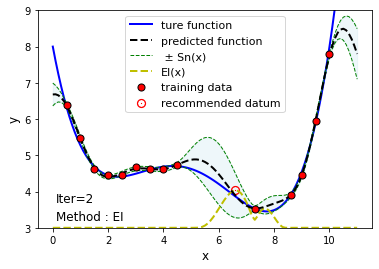

current optimal is : 3.529144688278847
The next datum recomended by Expected Improvement : 
 x =  [7.6]
--------------Draw samples-------------
real std of added datum: 0.0032258848827217425
1 -th sampling, result =  3.466757791839088
2 -th sampling, result =  3.455906395519626
3 -th sampling, result =  3.4614126987363454
4 -th sampling, result =  3.461174953445319
5 -th sampling, result =  3.46749514204674
evaluated mean of added datum: [3.4625494]
evaluated std of added datum: 0.004230404895157537
---------------------------------------

4-th iteration 
 new added datum: (7.6000000000000005, array([3.4625494]))


<Figure size 432x288 with 0 Axes>

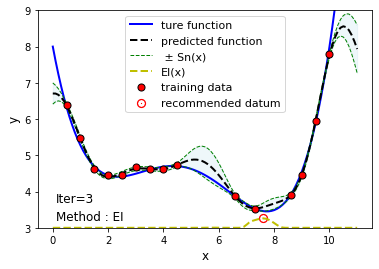

current optimal is : 3.4625493963174234
The next datum recomended by Expected Improvement : 
 x =  [7.7]
--------------Draw samples-------------
real std of added datum: 0.002898650424382877
1 -th sampling, result =  3.454900558567267
2 -th sampling, result =  3.4534602040388234
3 -th sampling, result =  3.4544315665849754
4 -th sampling, result =  3.449473060513182
5 -th sampling, result =  3.454514415678716
evaluated mean of added datum: [3.45335596]
evaluated std of added datum: 0.001998624980507964
---------------------------------------

5-th iteration 
 new added datum: (7.7, array([3.45335596]))


<Figure size 432x288 with 0 Axes>

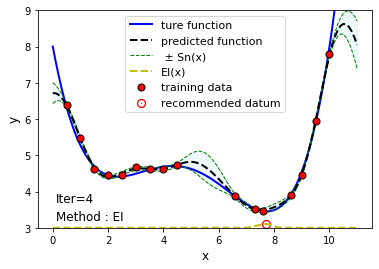

last response =  3.4625493963174234
added datum y =  [3.45335596] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [10]:
data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
noise_level = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    opt_noise = likelihood_opt_noise(data_matrix, Measured_response)
    noise_level.append(opt_noise)
    
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = opt_noise).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  

    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,np.sqrt(opt_noise),obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std**2)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('optnoise_likelihood__{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('optnoise_likelihood__{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('optnoise_likelihood_iter{time}data.csv'.format(time = i+1),float_format='%.4f') 

# optimal noise level of loocv

In [132]:
from sklearn.metrics import r2_score
from sklearn.model_selection import LeaveOneOut
def loocv_opt_noise(X,Y):
    loo = LeaveOneOut()
    loo.get_n_splits(X)
    R2_list = []
    sigma2_list = []
    for i in range(100):
        sigma2 = i/200 # variance, sigma2
        ypre = []
        noise_kernel = RBF() 
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            model = GaussianProcessRegressor(kernel=noise_kernel,alpha=sigma2,normalize_y=True,random_state=0).fit(X_train,y_train)
            y_pre = model.predict(X_test)
            ypre.append(y_pre)       
        R2_list.append(r2_score(Y,ypre))
        sigma2_list.append(sigma2)
        index = R2_list.index(max(R2_list))
    return sigma2_list[index]

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.4528822194
The next datum recomended by Expected Improvement : 
 x =  [8.4]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  4.223704325571967
2 -th sampling, result =  3.8644023751856853
3 -th sampling, result =  3.123429564308136
4 -th sampling, result =  3.3197321269976623
5 -th sampling, result =  2.0676168588913777
evaluated mean of added datum: [3.31977705]
evaluated std of added datum: 0.7375850792565353
---------------------------------------

1-th iteration 
 new added datum: (8.4, array([3.31977705]))


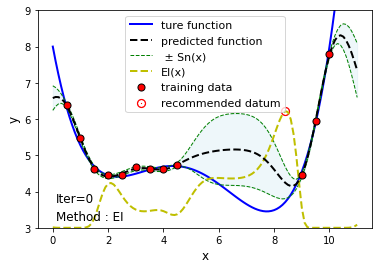

current optimal is : 3.319777050190966
The next datum recomended by Expected Improvement : 
 x =  [7.9]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.163972666303339
2 -th sampling, result =  3.385534069261925
3 -th sampling, result =  2.526327624502743
4 -th sampling, result =  3.041966852656282
5 -th sampling, result =  4.679382804228343
evaluated mean of added datum: [3.3594368]
evaluated std of added datum: 0.7177747299629915
---------------------------------------

2-th iteration 
 new added datum: (7.9, array([3.3594368]))


<Figure size 432x288 with 0 Axes>

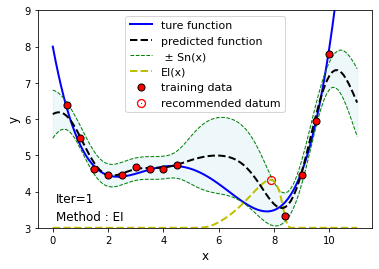

last response =  3.319777050190966
added datum y =  [3.3594368] , attached the coverge criteia


<Figure size 432x288 with 0 Axes>

In [133]:
data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
cal_name = data.columns[1:]

response_array = copy.deepcopy(Measured_response)

recom_x = []   
recom_obs = []
recom_real_std = []
recom_estimate_mu = []
recom_estimate_std = []
noise_level = []
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    # opt_noise = likelihood_opt_noise(data_matrix, Measured_response)
    opt_noise = loocv_opt_noise(data_matrix, Measured_response)
    noise_level.append(opt_noise)
    
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = opt_noise).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  

    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.EI()*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
  
    datum_y, datum_std, Y_obs = Sam_function(recommend,np.sqrt(opt_noise),obs)
    
    recom_x.append(recommend)
    # Y_obs is the sampling results, array type
    recom_obs.append(Y_obs) 
    recom_estimate_mu.append(datum_y)
    recom_estimate_std.append(datum_std**2)
    
    
    data_matrix = np.append(data_matrix,recommend).reshape(-1,1)
    Measured_response = np.append(Measured_response,datum_y)
 
    
    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',(recommend,datum_y))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('optnoise_loocv_{name}-sd_{sdlevel}-obs_{obstime}-{num}.png'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.savefig('optnoise_loocv_{name}-sd_{sdlevel}-obs_{obstime}-{num}.svg'.format(name = method_name,sdlevel=guessed_noise_std,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if  abs(datum_y - response_array[-1]) / response_array[-1] <= tolerance:
        print('last response = ',response_array[-1])
        print('added datum y = ',datum_y, ', attached the coverge criteia')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    elif i>=10:
        print('Searching is defeated')
        recom_dataset = pd.DataFrame(np.array(recom_obs))
        recom_dataset.columns = cal_name
        recom_dataset.insert(loc = 0, column = 'x', value = np.array(recom_x))
        recom_dataset.insert(loc = 1, column = 'true_y', value = True_function(np.array(recom_x)))
        recom_dataset.insert(loc = 2, column = 'noise', value = np.array(noise_level))
        recom_dataset['estimated_mu'] = np.array(recom_estimate_mu)
        recom_dataset['estimated_std'] = np.array(recom_estimate_std)
        break
    else:
        response_array = np.append(response_array,datum_y)
        

recom_dataset.to_csv('optnoise_loocv_iter{time}data.csv'.format(time = i+1),float_format='%.4f') 